# ***Ejecutar este codigo despues de haber ejecutado tablas Fact si no se tienen***

In [626]:
from google.colab import drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib


drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Reto IA Periodo2/Datos/Predicciones


In [627]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos
Base			Dimensiones  Predicciones  Test		  tVenta.csv
CaracteristicasCliente	Fact	     tCliente.csv  tProducto.csv


In [628]:
tCliente = pd.read_csv("tCliente.csv")
tProducto = pd.read_csv("tProducto.csv")
tVenta = pd.read_csv("tVenta.csv")

In [629]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/CaracteristicasCliente"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/CaracteristicasCliente
tClienteAutoHora.csv		tClienteMovilidadDia.csv
tClienteAutoVelocidadHora.csv	tClienteMovilidadHora.csv
tClienteEdadDemografica.csv	tClienteNivelSocieconomicoDemografico.csv
tClienteFlujoDemografico.csv	tClienteOcupacionDemografica.csv
tClienteGastoDemografico.csv	tClientePadron.csv
tClienteHogaresDemografica.csv	tClienteVotantesDemografica.csv
tClienteIngresoDemografico.csv	tClienteZona.csv


In [630]:
tClienteGastoDemografico = pd.read_csv("tClienteGastoDemografico.csv")
tClienteNivelSocieconomicoDemografico = pd.read_csv("tClienteNivelSocieconomicoDemografico.csv")
tClienteZona = pd.read_csv("tClienteZona.csv")


In [631]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Dimensiones"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Dimensiones
dimContenedor.csv  dimNivelSociEconomico.csv  dimProductoTipo.csv  dimSubCanal.csv  dimZone.csv
dimMarca.csv	   dimProductoCategoria.csv   dimSabor.csv	   dimTamano.csv


In [632]:
dimSubCanal = pd.read_csv('dimSubCanal.csv')
dimNivelSocieconomico = pd.read_csv('dimNivelSociEconomico.csv')
dimZona = pd.read_csv('dimZone.csv')

dimMarca = pd.read_csv('dimMarca.csv')
dimProductoCategoria = pd.read_csv('dimProductoCategoria.csv')
dimTamano = pd.read_csv('dimTamano.csv')
dimContenedor = pd.read_csv('dimContenedor.csv')
dimProductoTipo = pd.read_csv('dimProductoTipo.csv')
dimSabor = pd.read_csv('dimSabor.csv')


In [633]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Fact"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Fact
factClienteCompraVariacion.csv		     factClienteVentaCategoria.csv
factClienteCompraVariacionTipo.csv	     factClienteVentaTipo.csv
factClienteCompraVariacionTipoExitoso.csv    tProductoClienteExitoso.csv
factClienteProductoVentaPromedioMensual.csv


In [634]:
factClienteCompraVariacion = pd.read_csv("factClienteCompraVariacion.csv")
factClienteVentaCategoria = pd.read_csv("factClienteVentaCategoria.csv")

factClienteVentaTipo = pd.read_csv("factClienteVentaTipo.csv")
factClienteCompraVariacionTipo = pd.read_csv("factClienteCompraVariacionTipo.csv")

factClienteCompraVariacionTipoExitoso = pd.read_csv("factClienteCompraVariacionTipoExitoso.csv")


# Clusters

## Clusters Clientes

In [635]:
CambioNombre = {'AGUA': 'AGUA_Compra',
        'AGUA MINERAL CON SABOR': 'AGUA MINERAL CON SABOR_Compra',
        'AGUA SALUDABLE': 'AGUA SALUDABLE_Compra',
        'BEBIDAS ALTERNATIVAS': 'BEBIDAS ALTERNATIVAS_Compra',
        'BEBIDAS CON ALCOHOL': 'BEBIDAS CON ALCOHOL_Compra',
        'CAFES': 'CAFES_Compra',
        'JUGOS Y NECTARES': 'JUGOS Y NECTARES_Compra',
        'LACTEOS': 'LACTEOS_Compra',
        'REFRESCOS': 'REFRESCOS_Compra'
                }
factClienteVentaCategoria = factClienteVentaCategoria.rename(columns=CambioNombre)

columnas_para_cambiar = [
    'AGUA FUNCIONAL', 'AGUA MINERAL', 'AGUA PURIFICADA',
    'AGUA SABORIZADA', 'BEBIDA ALCOHOLICA', 'BEBIDAS DE SOYA',
    'BEBIDAS ENERGETICAS', 'BEBIDAS INFANTILES', 'BEBIDAS REFRESCANTES',
    'CAFE GRANO', 'CAFE MOLIDO', 'COLAS LIGHT', 'COLAS REGULAR',
    'ISOTONICOS', 'JUGOS Y NECTARES', 'LECHE UHT ESPECIALIZADA',
    'LECHE UHT REGULAR', 'LECHE UHT SABORIZADA', 'MIXTOS', 'NARANJADAS',
    'SABORES LIGHT', 'SABORES REGULAR', 'TE'
]

# Crear el diccionario de cambio para las columnas faltantes
for columna in columnas_para_cambiar:
    CambioNombre[columna] = columna + "_CompraTipo"

factClienteVentaTipo = factClienteVentaTipo.rename(columns=CambioNombre)

columnas_para_cambiar = [
    'AGUA FUNCIONAL', 'AGUA MINERAL', 'AGUA PURIFICADA',
    'AGUA SABORIZADA', 'BEBIDA ALCOHOLICA', 'BEBIDAS DE SOYA',
    'BEBIDAS ENERGETICAS', 'BEBIDAS INFANTILES', 'BEBIDAS REFRESCANTES',
    'CAFE GRANO', 'CAFE MOLIDO', 'COLAS LIGHT', 'COLAS REGULAR',
    'ISOTONICOS', 'JUGOS Y NECTARES', 'LECHE UHT ESPECIALIZADA',
    'LECHE UHT REGULAR', 'LECHE UHT SABORIZADA', 'MIXTOS', 'NARANJADAS',
    'SABORES LIGHT', 'SABORES REGULAR', 'TE'
]

# Crear el diccionario de cambio para las columnas faltantes
for columna in columnas_para_cambiar:
    CambioNombre[columna] = columna + "_Tipo"

factClienteCompraVariacionTipo = factClienteCompraVariacionTipo.rename(columns=CambioNombre)

columnas_para_cambiar = [
    'AGUA FUNCIONAL', 'AGUA MINERAL', 'AGUA PURIFICADA',
    'AGUA SABORIZADA', 'BEBIDA ALCOHOLICA', 'BEBIDAS DE SOYA',
    'BEBIDAS ENERGETICAS', 'BEBIDAS INFANTILES', 'BEBIDAS REFRESCANTES',
    'CAFE GRANO', 'CAFE MOLIDO', 'COLAS LIGHT', 'COLAS REGULAR',
    'ISOTONICOS', 'JUGOS Y NECTARES', 'LECHE UHT ESPECIALIZADA',
    'LECHE UHT REGULAR', 'LECHE UHT SABORIZADA', 'MIXTOS', 'NARANJADAS',
    'SABORES LIGHT', 'SABORES REGULAR', 'TE'
]

# Crear el diccionario de cambio para las columnas faltantes
for columna in columnas_para_cambiar:
    CambioNombre[columna] = columna + "_TipoExitoso"

factClienteCompraVariacionTipoExitoso = factClienteCompraVariacionTipoExitoso.rename(columns=CambioNombre)


tCliente = tCliente.astype({'CustomerId': 'int'})
tVenta = tVenta.astype({'CustomerId': 'int', 'Material': "int",  "uni_box": "float"})
tVenta["calmonth"] = pd.to_datetime(tVenta["calmonth"])
tProducto = tProducto.astype({'Material': "int"})

# ///////////////////////////////////////////////////////////////////////
# AGREGA COLUMNA DE PRIMERA VENTA DEL ID DE MATERIAL
oFirstDate = tVenta.groupby('Material')['calmonth'].min().reset_index()
# Renombra la columna para hacer el merge
oFirstDate.rename(columns={'calmonth': 'dVentaFirst'}, inplace=True)
tVenta = tVenta.merge(oFirstDate, on='Material', how='left')
#tVenta["sMes"] =  tVenta['calmonth'].str[-2:].astype(str)

tVentaProducto = pd.merge(tVenta,tProducto, left_on="Material", right_on="Material")

tClienteCluster = factClienteVentaCategoria.merge(factClienteCompraVariacion, on="CustomerId", how="inner").merge(tCliente, on="CustomerId", how="inner").merge(tClienteNivelSocieconomicoDemografico, on="CustomerId", how="inner").merge(tClienteGastoDemografico, on="CustomerId", how="inner").merge(factClienteVentaTipo, on="CustomerId", how="inner").merge(factClienteCompraVariacionTipo, on="CustomerId", how="inner").merge(factClienteCompraVariacionTipoExitoso, on="CustomerId", how="inner")

In [636]:
factClienteCompraVariacionTipo.columns

Index(['CustomerId', 'uni_box', 'AGUA FUNCIONAL_Tipo', 'AGUA MINERAL_Tipo',
       'AGUA PURIFICADA_Tipo', 'AGUA SABORIZADA_Tipo',
       'BEBIDA ALCOHOLICA_Tipo', 'BEBIDAS DE SOYA_Tipo',
       'BEBIDAS ENERGETICAS_Tipo', 'BEBIDAS INFANTILES_Tipo',
       'BEBIDAS REFRESCANTES_Tipo', 'CAFE GRANO_Tipo', 'CAFE MOLIDO_Tipo',
       'COLAS LIGHT_Tipo', 'COLAS REGULAR_Tipo', 'ISOTONICOS_Tipo',
       'JUGOS Y NECTARES_Tipo', 'LECHE UHT ESPECIALIZADA_Tipo',
       'LECHE UHT REGULAR_Tipo', 'LECHE UHT SABORIZADA_Tipo', 'MIXTOS_Tipo',
       'NARANJADAS_Tipo', 'SABORES LIGHT_Tipo', 'SABORES REGULAR_Tipo',
       'TE_Tipo'],
      dtype='object')

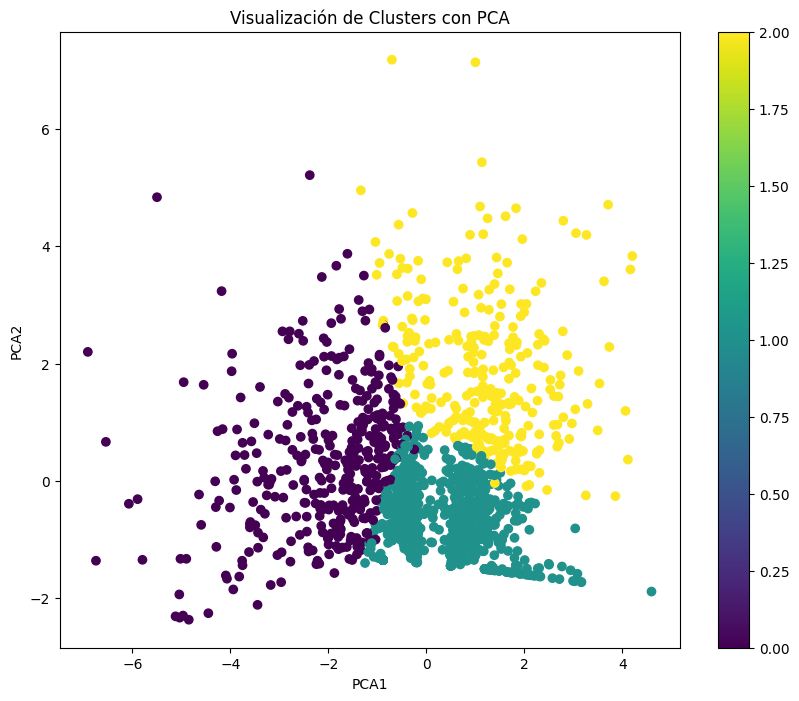

In [637]:

# Variables a usar en el clustering
variables_clustering = [ 'pob_ab_300m',
       'pob_cmas_300m', 'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m',
       'pob_d_300m', 'pob_e_300m', "iIdNivelSocieconomico"  ]


# Unir las dummies con las demás variables
df_clustering = pd.concat([tClienteCluster[variables_clustering]], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicar K-means
oClienteClusterModelo = KMeans(n_clusters=3, random_state=42)
oClienteClusterModelo.fit(df_scaled)

# Agregar los clusters a los datos originales
tClienteCluster['iIdClusterCliente'] = oClienteClusterModelo.labels_

# Visualización con PCA (reducción de dimensiones)
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# Crear un scatter plot para visualizar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=oClienteClusterModelo.labels_, cmap='viridis')
plt.title('Visualización de Clusters con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

## Subclusters Clientes Patrones de Compra

In [638]:
'''
# Aplicar transformación logarítmica para reducir el peso
tClienteCluster['AGUA_Compra_Ajuste'] = np.log1p(tClienteCluster['AGUA_Compra'])


# Variables a usar en el clustering
variables_clustering = [
    'AGUA_Compra_Ajuste', 'AGUA MINERAL CON SABOR_Compra', 'AGUA SALUDABLE_Compra',
    'BEBIDAS ALTERNATIVAS_Compra', 'BEBIDAS CON ALCOHOL_Compra',
    'CAFES_Compra', 'JUGOS Y NECTARES_Compra', 'LACTEOS_Compra',
    'REFRESCOS_Compra','AGUA', 'AGUA MINERAL CON SABOR', 'AGUA SALUDABLE',
    'BEBIDAS ALTERNATIVAS', 'BEBIDAS CON ALCOHOL', 'CAFES',
    'JUGOS Y NECTARES', 'LACTEOS', 'REFRESCOS'
]

# Estandarizar todos los datos una sola vez y crear un DataFrame escalado
scaler = StandardScaler()
df_scaled_all = pd.DataFrame(
    scaler.fit_transform(tClienteCluster[variables_clustering]),
    columns=variables_clustering
)

# Agregar columna de subclusters
tClienteCluster['iIdSubClusterCliente'] = None  # Inicializa columna
oClienteSubClusterModelo = KMeans(n_clusters=12, random_state=42)
oClienteSubClusterModelo.fit(df_scaled_all)

# Iterar y subclusterizar
for iCluster, df_cluster in tClienteCluster.groupby('iIdClusterCliente'):
    # Filtrar y aplicar KMeans al subset escalado
    subcluster_labels = oClienteSubClusterModelo.fit_predict(df_scaled_all.loc[df_cluster.index])

    # Actualizar etiquetas en la columna del DataFrame original
    tClienteCluster.loc[df_cluster.index, 'iIdSubClusterCliente'] = subcluster_labels
'''

"\n# Aplicar transformación logarítmica para reducir el peso\ntClienteCluster['AGUA_Compra_Ajuste'] = np.log1p(tClienteCluster['AGUA_Compra'])\n\n\n# Variables a usar en el clustering\nvariables_clustering = [\n    'AGUA_Compra_Ajuste', 'AGUA MINERAL CON SABOR_Compra', 'AGUA SALUDABLE_Compra',\n    'BEBIDAS ALTERNATIVAS_Compra', 'BEBIDAS CON ALCOHOL_Compra',\n    'CAFES_Compra', 'JUGOS Y NECTARES_Compra', 'LACTEOS_Compra',\n    'REFRESCOS_Compra','AGUA', 'AGUA MINERAL CON SABOR', 'AGUA SALUDABLE',\n    'BEBIDAS ALTERNATIVAS', 'BEBIDAS CON ALCOHOL', 'CAFES',\n    'JUGOS Y NECTARES', 'LACTEOS', 'REFRESCOS'\n]\n\n# Estandarizar todos los datos una sola vez y crear un DataFrame escalado\nscaler = StandardScaler()\ndf_scaled_all = pd.DataFrame(\n    scaler.fit_transform(tClienteCluster[variables_clustering]),\n    columns=variables_clustering\n)\n\n# Agregar columna de subclusters\ntClienteCluster['iIdSubClusterCliente'] = None  # Inicializa columna\noClienteSubClusterModelo = KMeans(n_clus

In [639]:

# Aplicar transformación logarítmica para reducir el peso
tClienteCluster['JUGOS Y NECTARES_CompraTipo_Ajuste'] = np.log1p(tClienteCluster['JUGOS Y NECTARES_CompraTipo'])
tClienteCluster['AGUA MINERAL_CompraTipo_Ajuste'] = np.log1p(tClienteCluster['AGUA MINERAL_CompraTipo'])
tClienteCluster['AGUA PURIFICADA_CompraTipo_Ajuste'] = np.log1p(tClienteCluster['AGUA PURIFICADA_CompraTipo'])
tClienteCluster['COLAS REGULAR_CompraTipo_Ajuste'] = np.log1p(tClienteCluster['COLAS REGULAR_CompraTipo'])

'''
    'AGUA FUNCIONAL_CompraTipo', 'AGUA SABORIZADA_CompraTipo',
       'BEBIDA ALCOHOLICA_CompraTipo', 'BEBIDAS DE SOYA_CompraTipo',
       'BEBIDAS ENERGETICAS_CompraTipo', 'BEBIDAS INFANTILES_CompraTipo',
       'BEBIDAS REFRESCANTES_CompraTipo', 'CAFE GRANO_CompraTipo',
       'CAFE MOLIDO_CompraTipo', 'COLAS LIGHT_CompraTipo', 'ISOTONICOS_CompraTipo',
       'LECHE UHT ESPECIALIZADA_CompraTipo',
       'LECHE UHT REGULAR_CompraTipo', 'LECHE UHT SABORIZADA_CompraTipo',
       'MIXTOS_CompraTipo', 'NARANJADAS_CompraTipo',
       'SABORES LIGHT_CompraTipo', 'SABORES REGULAR_CompraTipo',
       'TE_CompraTipo','JUGOS Y NECTARES_CompraTipo_Ajuste', 'AGUA MINERAL_CompraTipo_Ajuste', 'AGUA PURIFICADA_CompraTipo_Ajuste', 'COLAS REGULAR_CompraTipo_Ajuste',


            'AGUA FUNCIONAL_TipoExitoso',
           'AGUA SABORIZADA_TipoExitoso',
          'BEBIDA ALCOHOLICA_TipoExitoso', 'BEBIDAS DE SOYA_TipoExitoso',
          'BEBIDAS ENERGETICAS_TipoExitoso', 'BEBIDAS INFANTILES_TipoExitoso',
          'BEBIDAS REFRESCANTES_TipoExitoso', 'CAFE MOLIDO_TipoExitoso',
          'COLAS LIGHT_TipoExitoso',
          'ISOTONICOS_TipoExitoso', 'JUGOS Y NECTARES_TipoExitoso',
          'LECHE UHT ESPECIALIZADA_TipoExitoso', 'LECHE UHT REGULAR_TipoExitoso',
          'LECHE UHT SABORIZADA_TipoExitoso', 'MIXTOS_TipoExitoso',
          'NARANJADAS_TipoExitoso', 'SABORES LIGHT_TipoExitoso',
          'SABORES REGULAR_TipoExitoso', 'TE_TipoExitoso',

'''

# Variables a usar en el clustering
variables_clustering = [
    'AGUA FUNCIONAL_CompraTipo', 'AGUA SABORIZADA_CompraTipo',
       'BEBIDA ALCOHOLICA_CompraTipo', 'BEBIDAS DE SOYA_CompraTipo',
       'BEBIDAS ENERGETICAS_CompraTipo', 'BEBIDAS INFANTILES_CompraTipo',
       'BEBIDAS REFRESCANTES_CompraTipo', 'CAFE GRANO_CompraTipo',
       'CAFE MOLIDO_CompraTipo', 'COLAS LIGHT_CompraTipo', 'ISOTONICOS_CompraTipo',
       'LECHE UHT ESPECIALIZADA_CompraTipo',
       'LECHE UHT REGULAR_CompraTipo', 'LECHE UHT SABORIZADA_CompraTipo',
       'MIXTOS_CompraTipo', 'NARANJADAS_CompraTipo',
       'SABORES LIGHT_CompraTipo', 'SABORES REGULAR_CompraTipo',
       'TE_CompraTipo','JUGOS Y NECTARES_CompraTipo_Ajuste', 'AGUA MINERAL_CompraTipo_Ajuste', 'AGUA PURIFICADA_CompraTipo_Ajuste', 'COLAS REGULAR_CompraTipo_Ajuste',



]# 'COLAS REGULAR_TipoExitoso','AGUA PURIFICADA_TipoExitoso','AGUA MINERAL_TipoExitoso',

# Estandarizar todos los datos una sola vez y crear un DataFrame escalado
scaler = StandardScaler()
df_scaled_all = pd.DataFrame(
    scaler.fit_transform(tClienteCluster[variables_clustering]),
    columns=variables_clustering
)

# Agregar columna de subclusters
tClienteCluster['iIdSubClusterCliente'] = None  # Inicializa columna
oClienteSubClusterModelo = KMeans(n_clusters=12, random_state=42)
oClienteSubClusterModelo.fit(df_scaled_all)

# Iterar y subclusterizar
for iCluster, df_cluster in tClienteCluster.groupby('iIdClusterCliente'):
    # Filtrar y aplicar KMeans al subset escalado
    subcluster_labels = oClienteSubClusterModelo.fit_predict(df_scaled_all.loc[df_cluster.index])

    # Actualizar etiquetas en la columna del DataFrame original
    tClienteCluster.loc[df_cluster.index, 'iIdSubClusterCliente'] = subcluster_labels


In [640]:
print( tClienteCluster[[
    "iIdSubClusterCliente", "iIdClusterCliente"
]].groupby("iIdSubClusterCliente").count() )

                      iIdClusterCliente
iIdSubClusterCliente                   
0                                   184
1                                   296
2                                   132
3                                    39
4                                    83
5                                     7
6                                   256
7                                    80
8                                   385
9                                    43
10                                    5
11                                   35


In [641]:
tClienteCluster.columns

Index(['CustomerId', 'AGUA_Compra', 'AGUA MINERAL CON SABOR_Compra',
       'AGUA SALUDABLE_Compra', 'BEBIDAS ALTERNATIVAS_Compra',
       'BEBIDAS CON ALCOHOL_Compra', 'CAFES_Compra', 'JUGOS Y NECTARES_Compra',
       'LACTEOS_Compra', 'REFRESCOS_Compra',
       ...
       'LECHE UHT SABORIZADA_TipoExitoso', 'MIXTOS_TipoExitoso',
       'NARANJADAS_TipoExitoso', 'SABORES LIGHT_TipoExitoso',
       'SABORES REGULAR_TipoExitoso', 'TE_TipoExitoso',
       'JUGOS Y NECTARES_CompraTipo_Ajuste', 'AGUA MINERAL_CompraTipo_Ajuste',
       'AGUA PURIFICADA_CompraTipo_Ajuste', 'COLAS REGULAR_CompraTipo_Ajuste'],
      dtype='object', length=138)

## Clusters Productos

In [642]:
tProducto.columns

Index(['Material', 'Material_desc', 'Productos_Por_Empaque', 'BrandPresRet',
       'ProdKey', 'Presentation', 'MLSize', 'Pack', 'Ncb', 'SegAg', 'SegDet',
       'GlobalCategory', 'GlobalSubcategory', 'BrandGrouper', 'GlobalFlavor',
       'dPrimeraVenta', 'iIdProductoTipo', 'iIdContenedor', 'iIdMarca',
       'iIdProductoCategoria', 'iIdTamano', 'iIdSabor', 'bReturnability',
       'bViejo', 'bExitoso', 'iIdClusterProducto'],
      dtype='object')

In [643]:
tProductoCluster = tProducto.copy()

In [644]:
# Variables a usar en el clustering
tProductoCluster['MLSize'] = tProductoCluster['MLSize'] / 100
tProductoCluster['bReturnability'] = tProductoCluster['bReturnability'] * 50

variables_clustering = ["iIdContenedor", 'iIdProductoTipo', 'iIdTamano', "iIdSabor", "Productos_Por_Empaque" ,"MLSize" ,'bReturnability']

# Unir las dummies con las demás variables
df_clustering = pd.concat([tProducto[variables_clustering]], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicar K-means
oProductoClusterModelo = KMeans(n_clusters=10, random_state=42)
oProductoClusterModelo.fit(df_scaled)

# Agregar los clusters a los datos originales
tProductoCluster['iIdClusterProducto'] = oProductoClusterModelo.labels_

# Visualización con PCA (reducción de dimensiones)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Crear un scatter plot para visualizar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=oProductoClusterModelo.labels_, cmap='viridis')
plt.title('Visualización de Clusters con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

In [645]:
tProductoClusterMerge = tProductoCluster.merge(dimMarca, on="iIdMarca", how="inner").merge(dimProductoCategoria, on="iIdProductoCategoria", how="inner").merge(dimTamano, on="iIdTamano", how="inner").merge(dimContenedor, on="iIdContenedor", how="inner")

In [646]:
tProductoClusterMerge.groupby("iIdClusterProducto").agg({"bExitoso": "sum", "Material": "count"}).reset_index()

iIdClusterProducto  bExitoso  Material
0                   0         4       101
1                   1         8        55
2                   2        34        71
3                   3        25        40
4                   4        25        70
5                   5        11        48
6                   6        13       102
7                   7        22        42
8                   8        10       106
9                   9        37        70

In [647]:
tProducto = tProducto.drop("iIdClusterProducto", axis=1)
tProducto = tProducto.merge(tProductoCluster[["Material", "iIdClusterProducto"]], on="Material", how="inner")



tCliente = tCliente.drop("iIdClusterCliente", axis=1)
tCliente = tCliente.drop("iIdSubClusterCliente", axis=1)
tCliente = tCliente.merge(tClienteCluster[["CustomerId", "iIdClusterCliente", "iIdSubClusterCliente"]], on="CustomerId", how="inner")

In [648]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos
Base			Dimensiones  Predicciones  Test		  tVenta.csv
CaracteristicasCliente	Fact	     tCliente.csv  tProducto.csv


In [649]:
tProducto.to_csv("tProducto.csv", index=False)
tCliente.to_csv("tCliente.csv", index=False)

# Exportacion Modelos

In [650]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Modelos/Clustering"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Modelos/Clustering
ClienteCluster.pkl  ClienteSubCluster.pkl  ProductoCluster.pkl


In [651]:
joblib.dump(oClienteClusterModelo, 'ClienteCluster.pkl')
joblib.dump(oClienteSubClusterModelo, 'ClienteSubCluster.pkl')
joblib.dump(oProductoClusterModelo, 'ProductoCluster.pkl')

['ProductoCluster.pkl']

# Predicciones

## Inicio

In [652]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Fact"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Fact
factClienteCompraVariacion.csv		     factClienteVentaCategoria.csv
factClienteCompraVariacionTipo.csv	     factClienteVentaTipo.csv
factClienteCompraVariacionTipoExitoso.csv    tProductoClienteExitoso.csv
factClienteProductoVentaPromedioMensual.csv


In [653]:
factClienteVentaCategoria = pd.read_csv('factClienteVentaCategoria.csv')
factClienteCompraVariacion = pd.read_csv('factClienteCompraVariacion.csv')
tProductoClienteExitoso = pd.read_csv('tProductoClienteExitoso.csv')


In [654]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Test"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Test
tProductoTest.csv  tVentaTest.csv


In [655]:
tProductoTest = pd.read_csv('tProductoTest.csv')
tVentaTest = pd.read_csv('tVentaTest.csv')

In [656]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Dimensiones"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Dimensiones
dimContenedor.csv  dimNivelSociEconomico.csv  dimProductoTipo.csv  dimSubCanal.csv  dimZone.csv
dimMarca.csv	   dimProductoCategoria.csv   dimSabor.csv	   dimTamano.csv


In [657]:
dimSubCanal = pd.read_csv('dimSubCanal.csv')
dimNivelSocieconomico = pd.read_csv('dimNivelSociEconomico.csv')
dimZona = pd.read_csv('dimZone.csv')

dimMarca = pd.read_csv('dimMarca.csv')
dimProductoCategoria = pd.read_csv('dimProductoCategoria.csv')
dimTamano = pd.read_csv('dimTamano.csv')
dimContenedor = pd.read_csv('dimContenedor.csv')
dimSabor = pd.read_csv('dimSabor.csv')


In [658]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/CaracteristicasCliente"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/CaracteristicasCliente
tClienteAutoHora.csv		tClienteMovilidadDia.csv
tClienteAutoVelocidadHora.csv	tClienteMovilidadHora.csv
tClienteEdadDemografica.csv	tClienteNivelSocieconomicoDemografico.csv
tClienteFlujoDemografico.csv	tClienteOcupacionDemografica.csv
tClienteGastoDemografico.csv	tClientePadron.csv
tClienteHogaresDemografica.csv	tClienteVotantesDemografica.csv
tClienteIngresoDemografico.csv	tClienteZona.csv


In [659]:
tClienteZona = pd.read_csv('tClienteZona.csv')
tClienteMovilidadDia = pd.read_csv('tClienteMovilidadDia.csv')
tClienteNivelSocieconomicoDemografico = pd.read_csv('tClienteNivelSocieconomicoDemografico.csv')
tClienteFlujoDemografico = pd.read_csv('tClienteFlujoDemografico.csv')
tClienteGastoDemografico = pd.read_csv('tClienteGastoDemografico.csv')

## Conjunto Cluster Producto con Cluster de Cliente

In [660]:

tVentaProductoCluster = tVenta.merge(tProducto, on="Material", how="inner").merge(tCliente, on="CustomerId", how="inner")
tVentaClienteProductoCluster = tVentaProductoCluster.groupby(["iIdClusterCliente","iIdSubClusterCliente", "iIdClusterProducto"]).agg({"uni_box": "mean"}).reset_index()
tClusterProductoVentaPromedio = tVentaClienteProductoCluster.groupby(["iIdClusterProducto"]).agg({"uni_box": "mean"}).reset_index().sort_values("uni_box", ascending=False)
tClusterProductoVentaPromedio.rename(columns={"uni_box": "fVentaPromedio"}, inplace=True)
tClusterProductoVentaPromedio

iIdClusterProducto  fVentaPromedio
3                   3      119.115140
7                   7       76.829280
2                   2       66.723717
5                   5       53.110292
9                   9       17.631543
6                   6       13.419212
4                   4        8.817647
8                   8        6.090660
1                   1        3.882430
0                   0        3.536799

In [661]:
funcPrueba = lambda iIdCluster, fVentaPromedio: (True if float( tClusterProductoVentaPromedio[tClusterProductoVentaPromedio["iIdClusterProducto"] == iIdCluster]["fVentaPromedio"].values[0]) <= float(fVentaPromedio) else False)
tVentaClienteProductoCluster["ConsideradoCluster"] = tVentaClienteProductoCluster.apply(lambda x: funcPrueba(x["iIdClusterProducto"], x["uni_box"]), axis=1)

tFiltroClusterCliente = tVentaClienteProductoCluster.query("ConsideradoCluster == True")

In [662]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Predicciones"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Predicciones
tFiltroClusterCliente.csv  tProductoTestPredictedCluster.csv


In [663]:
tFiltroClusterCliente.to_csv("tFiltroClusterCliente.csv", index=False)

## Prueba

In [664]:
iMaterial = 483#tProducto.sample(1)["Material"].values[0]
tProducto[tProducto["Material"] == iMaterial]

Material                  Material_desc  Productos_Por_Empaque  \
670       483  COCA-COLA 2.5 LTS. RET PET 8B                      8   

                    BrandPresRet                            ProdKey  \
670  COCA-COLA 2.50 L RETORNABLE  COLAS REGULAR FAMILIAR RETORNABLE   

         Presentation  MLSize      Pack  Ncb  SegAg  ... iIdProductoTipo  \
670  2.5 LTS. RET PET    2500  2.5 LTS.    0  COLAS  ...              13   

    iIdContenedor iIdMarca iIdProductoCategoria iIdTamano iIdSabor  \
670             4        7                    9         2       16   

     bReturnability  bViejo  bExitoso  iIdClusterProducto  
670               1       1         1                   3  

[1 rows x 26 columns]

### Real

In [665]:
tVenta.query(f"Material == {iMaterial}").groupby("CustomerId").agg({"uni_box": "sum"}).reset_index().count()

CustomerId    1728
uni_box       1728
dtype: int64

In [666]:
tProductoClienteExitoso[tProductoClienteExitoso["Material"] == iMaterial].count()

CustomerId    1130
Material      1130
dtype: int64

### Prediccion

In [667]:
iClusterProducto = tProducto[tProducto["Material"] == iMaterial]["iIdClusterProducto"].values[0]

oClusterCliente = tFiltroClusterCliente[tFiltroClusterCliente["iIdClusterProducto"] == iClusterProducto]["iIdClusterCliente"].unique()
oSubClusterCliente = tFiltroClusterCliente[tFiltroClusterCliente["iIdClusterProducto"] == iClusterProducto]["iIdSubClusterCliente"].unique()

iClusterProducto

3

In [668]:
tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente)) ] ["CustomerId"].count()

346

In [669]:
tVentaMaterial = tProductoClienteExitoso.query(f'Material == {iMaterial}').groupby("CustomerId").count().reset_index()
tVentaMaterial[tVentaMaterial["CustomerId"].isin(tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente))  ] ["CustomerId"])].count()

CustomerId    209
Material      209
dtype: int64

## Test

In [670]:
tProductoTestHead = tProductoTest.copy()

# Selecciona las variables que usaste para entrenar el modelo kmeans para los productos
# (asegúrate de que el orden sea el mismo que en el entrenamiento)
tProductoTestHead['MLSize'] = tProductoTestHead['MLSize'] / 100
tProductoTestHead['bReturnability'] = tProductoTestHead['bReturnability'] * 50

oVariables = ["iIdContenedor", 'iIdProductoTipo', 'iIdTamano', "iIdSabor", "Productos_Por_Empaque" ,"MLSize" ,'bReturnability']
oProductosPredecir = tProductoTestHead[oVariables]

scaler = StandardScaler()



df_scaled = scaler.fit_transform(pd.concat([tProducto[oVariables]], axis=1))
oProductosPredecir = scaler.transform(oProductosPredecir)
tClusterPrediccion = oProductoClusterModelo.predict(oProductosPredecir)



tProductoTest["iIdClusterProducto"] = tClusterPrediccion.tolist()

tProductoTestHead

Material                             Material_desc  Productos_Por_Empaque  \
0      14532         COSTA DESCA TO MOL 500 G NR BOL 1                      1   
1       9366            FZT NG DZO 453 LATA 6B INK ART                      6   
2         26                      FRESCA 250 ML NR 12B                     12   
3      14587        COCA COLA S/A MARS 355ML NR LSL 6B                      6   
4      14594        CIEL MINERALIZADA 355 ML NR LSL 12                     12   
5        320                 COCA-COLA 2.00 L NR PET 9                      9   
6      14569     MIX 473 ML LAT 4(1MP1MMGO1MLOW1MORIG)                      4   
7      14595                 COCA-COLA 3.00 L NR PET 9                      9   
8       5859                       SPRITE ZERO600 PNR6                      6   
9      14528          COSTA MO ITA TM MO 1 KG NR BOL 1                      1   
10      2184                 BT CIEL AP BIDON 5 LTS NR                      1   
11     14580    TCH HARD S LIMA I 355 ML NR LAT 6 REFO                      6   
12     14579    TCH HARD S PINA T 355 ML NR LAT 6 REFO                      6   
13     14578   TCH HARDS MGO TROP 355 ML NR LAT 6 REFO                      6   
14     14581    TCH HARD S FRESA- 355 ML NR LAT 6 REFO                      6   
15      4439  MIX 235 ML LAT 4 (FANTA1NA1FR1UV1PN) MPK                      4   
16     14534          COSTA DESCA TO MOL 1 KG NR BOL 1                      1   
17     14460      SCL LECHE ENTERA 750ML NR TPK 6B MPK                      6   
18      9380                PULPY DURAZNO 400ML NRP 6B                      6   
19     14589               JOYA PONCHE 2.50 L NR PET 4                      4   
20     14434        T CH AGUA MINERAL 355 ML NR VID 4B                      4   

                                    BrandPresRet  \
0         COSTA DESCAFEINADO 500 G NO RETORNABLE   
1                  FUZE TEA 453 ML NO RETORNABLE   
2                    FRESCA 250 ML NO RETORNABLE   
3      COCA-COLA SIN AZUCAR 355 ML NO RETORNABLE   
4         CIEL MINERALIZADA 355 ML NO RETORNABLE   
5                 COCA-COLA 2.00 L NO RETORNABLE   
6            MONSTER ENERGY 473 ML NO RETORNABLE   
7                 COCA-COLA 3.00 L NO RETORNABLE   
8                    SPRITE 600 ML NO RETORNABLE   
9                       COSTA 1 KG NO RETORNABLE   
10     CIEL AGUA PURIFICADA 5.00 L NO RETORNABLE   
11  TOPO CHICO HARD SELTZER 355 ML NO RETORNABLE   
12  TOPO CHICO HARD SELTZER 355 ML NO RETORNABLE   
13  TOPO CHICO HARD SELTZER 355 ML NO RETORNABLE   
14  TOPO CHICO HARD SELTZER 355 ML NO RETORNABLE   
15                    FANTA 235 ML NO RETORNABLE   
16         COSTA DESCAFEINADO 1 KG NO RETORNABLE   
17       SANTA CLARA ENTERA 1.00 L NO RETORNABLE   
18                    PULPY 400 ML NO RETORNABLE   
19                     JOYA 2.50 L NO RETORNABLE   
20          TOPO CHICO A.M. 355 ML NO RETORNABLE   

                                 ProdKey    Presentation  MLSize        Pack  \
0                          NOT_SUGGESTED   BOLSA 500 GR.    0.00   BOLSA 500   
1                                     TE     LATA 453 ML    4.53        LATA   
2       SABORES INDIVIDUAL NO RETORNABLE  250 ML. NR PET    2.50      250 ML   
3                 COLAS LIGHT INDIVIDUAL            LATA    3.55        LATA   
4                AGUA MINERAL INDIVIDUAL     LATA 355 ML    3.55      355 ML   
5   COLAS REGULAR FAMILIAR NO RETORNABLE       2 LTS. NR   20.00      2 LTS.   
6                    BEBIDAS ENERGETICAS     LATA 473 ML    4.73      473 ML   
7   COLAS REGULAR FAMILIAR NO RETORNABLE       3 LTS. NR   30.00      3 LTS.   
8       SABORES INDIVIDUAL NO RETORNABLE       600 ML NR    6.00      600 ML   
9                          NOT_SUGGESTED     BOLSA 1 KG.    0.00  BOLSA 1 KG   
10              AGUA PURIFICADA FAMILIAR       5 LTS. NR   50.00      5 LTS.   
11                   BEBIDAS CON ALCOHOL     LATA 335 ML    3.55        LATA   
12                   BEBIDAS CON ALC

In [671]:
%cd "/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Predicciones"
!ls  # show current directory

/content/gdrive/MyDrive/Reto IA Periodo2/Datos/Predicciones
tFiltroClusterCliente.csv  tProductoTestPredictedCluster.csv


In [672]:
tProductoTest.to_csv("tProductoTestPredictedCluster.csv", index=False)

In [706]:
iMaterial = 26

tProductoTest[tProductoTest["Material"] == iMaterial]

Material         Material_desc  Productos_Por_Empaque  \
2        26  FRESCA 250 ML NR 12B                     12   

                  BrandPresRet                           ProdKey  \
2  FRESCA 250 ML NO RETORNABLE  SABORES INDIVIDUAL NO RETORNABLE   

     Presentation  MLSize    Pack  Ncb    SegAg  ... iIdProductoTipo  \
2  250 ML. NR PET     250  250 ML    0  SABORES  ...              22   

  iIdContenedor iIdMarca iIdProductoCategoria iIdTamano iIdSabor  \
2             4       23                    9         1       73   

   bReturnability  bViejo  bExitoso  iIdClusterProducto  
2               0       0         0                   0  

[1 rows x 26 columns]

### Real

In [707]:
print("La cantidad de clientes que compraron este producto son: ", tVentaTest[tVentaTest["Material"] == iMaterial].groupby("CustomerId").size().count() )
tVentaTest[tVentaTest["Material"] == iMaterial].groupby("CustomerId").size().reset_index()

La cantidad de clientes que compraron este producto son:  446


CustomerId  0
0     499921473  1
1     499921557  3
2     499921908  4
3     499924545  4
4     499924791  4
..          ... ..
441   510820586  1
442   510821474  1
443   510831125  1
444   510831510  1
445   510831672  1

[446 rows x 2 columns]

In [708]:
print("La cantidad de clientes exitosos son: ", tProductoClienteExitoso[tProductoClienteExitoso["Material"] == iMaterial].count().values[0] )
tProductoClienteExitoso[tProductoClienteExitoso["Material"] == iMaterial]

La cantidad de clientes exitosos son:  25


CustomerId  Material
451     499926418        26
489     499926963        26
804     499931398        26
875     499933687        26
2946    500020489        26
4643    500039890        26
4699    500040143        26
5112    500047259        26
14989   500231250        26
16857   500285783        26
19784   500372056        26
20033   500374550        26
20910   500384611        26
20936   500385082        26
21096   500387137        26
21781   500393698        26
22993   500403481        26
23925   500414039        26
24180   500417619        26
24980   500424196        26
25136   500425086        26
29404   510246580        26
32751   510511710        26
32787   510655488        26
32803   510704625        26

### Prediccion

In [709]:
iClusterProducto = tProductoTest[tProductoTest["Material"] == iMaterial]["iIdClusterProducto"].values[0]

oClusterCliente = tFiltroClusterCliente[tFiltroClusterCliente["iIdClusterProducto"] == iClusterProducto]["iIdClusterCliente"].unique()
oSubClusterCliente = tFiltroClusterCliente[tFiltroClusterCliente["iIdClusterProducto"] == iClusterProducto]["iIdSubClusterCliente"].unique()

print("Cluster del producto: ", iClusterProducto )

Cluster del producto:  0


In [710]:
print("Cantidad de clientes recomendados por cluster: ", tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente))  ] ["CustomerId"].count())
tClienteSeleccionado = tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente))  ] ["CustomerId"]
tClienteSeleccionado

Cantidad de clientes recomendados por cluster:  491


0       499920078
4       499921908
8       499924161
14      499926418
21      499930743
          ...    
1525    510586860
1526    510589040
1530    510635091
1535    510664246
1540    510672923
Name: CustomerId, Length: 491, dtype: int64

In [711]:
tVentaMaterial = tProductoClienteExitoso.query(f'Material == {iMaterial}').groupby("CustomerId").count().reset_index()
print("Cantidad de clientes exitosos que coinciden: ", tVentaMaterial[tVentaMaterial["CustomerId"].isin(tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente))  ] ["CustomerId"])].count().values[0] ) #0,1,2,3,4,5,10
tVentaMaterial[tVentaMaterial["CustomerId"].isin(tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente))  ] ["CustomerId"])]["CustomerId"]

Cantidad de clientes exitosos que coinciden:  5


0     499926418
3     499933687
9     500285783
15    500393698
21    510246580
Name: CustomerId, dtype: int64

In [712]:
tVentaTest[(tVentaTest["Material"] == iMaterial) & (tVentaTest["CustomerId"].isin(tCliente[(tCliente["iIdSubClusterCliente"].isin(oSubClusterCliente)) & (tCliente["iIdClusterCliente"].isin(oClusterCliente))]["CustomerId"]) ) ].groupby("CustomerId").size().count()

105

In [713]:
tProductoTestMerge = tProductoTest.merge(dimProductoTipo, on="iIdProductoTipo", how="inner")
sColumna =  tProductoTestMerge[tProductoTestMerge["Material"] == iMaterial]["sProductoTipo"].values[0]
sColumna = sColumna+"_CompraTipo"
tClienteTop50 = factClienteVentaTipo[factClienteVentaTipo["CustomerId"].isin( tClienteSeleccionado)][["CustomerId",sColumna]].sort_values(by=sColumna ,ascending=False).head(50)

In [714]:
print(tVentaTest[(tVentaTest["Material"] == iMaterial) & (tVentaTest["CustomerId"].isin(tClienteTop50["CustomerId"]) ) ].groupby("CustomerId").size().count())

tVentaTest[(tVentaTest["Material"] == iMaterial) & (tVentaTest["CustomerId"].isin(tClienteTop50["CustomerId"]) ) ].groupby("CustomerId")["uni_box"].sum().reset_index().sort_values(by="uni_box", ascending=False)

19


CustomerId  uni_box
8    500062485  31.7040
16   500539069  12.6816
11   500299466   4.7556
18   510385645   4.2272
12   500303456   4.2272
9    500276010   3.6988
14   500412410   3.1704
6    500057051   2.6420
7    500062013   2.6420
4    500030169   2.6420
10   500283413   2.1136
3    500013225   2.1136
0    499921908   2.1136
2    500009889   1.5852
1    499970469   1.0568
13   500387353   1.0568
5    500045958   0.5284
15   500412669   0.5284
17   510024943   0.5284

In [715]:
print(tVentaTest[(tVentaTest["Material"] == iMaterial) ].groupby("CustomerId")["uni_box"].sum().reset_index().sort_values(by="uni_box", ascending=False).head(10))

     CustomerId  uni_box
121   500062485  31.7040
159   500285783  14.7952
305   500539069  12.6816
425   510704625  12.6816
132   500231250  11.6248
358   510388461   7.9260
9     499929134   6.8692
6     499926418   6.3408
427   510725567   6.3408
280   500424196   5.8124


In [716]:
factClienteVentaTipo[["CustomerId",sColumna]].sort_values(by=sColumna ,ascending=False).head(50)

CustomerId  SABORES REGULAR_CompraTipo
267   500062485.0                     3963.28
729   500276010.0                     3199.71
571   500172038.0                     2041.62
547   500166811.0                     1650.95
1861  510702126.0                     1593.20
16    499927111.0                     1556.69
1353  510260457.0                     1309.99
610   500184158.0                     1292.29
40    499970469.0                     1235.87
1376  510278187.0                     1099.80
576   500173355.0                     1014.51
1379  510280442.0                      994.22
579   500173894.0                      938.39
1170  500539069.0                      889.26
1286  510151625.0                      886.70
1059  500417619.0                      883.40
479   500142356.0                      833.23
77    500009889.0                      829.01
764   500284629.0                      794.85
940   500387838.0                      791.17
306   500076757.0                      768.84
507   500153868.0                      757.45
1277  510140124.0                      736.12
641   500192652.0                      728.52
1236  510092801.0                      725.78
649   500196332.0                      720.44
282   500067900.0                      712.40
1362  510271512.0                      705.05
1248  510101349.0                      703.02
488   500145705.0                      691.59
1166  500536555.0                      669.53
903   500375547.0                      648.79
1041  500412129.0                      647.24
287   500070119.0                      647.01
1083  500424906.0                      642.65
541   500165341.0                      638.32
608   500183093.0                      630.24
572   500172065.0                      627.01
500   500149619.0                      619.80
815   500301851.0                      617.38
320   500084135.0                      602.86
93    500013225.0                      600.55
1014  500405224.0                      597.48
639   500192457.0                      596.86
1027  500410332.0                      591.64
1063  500418452.0                      590.98
679   500231250.0                      587.22
82    500010825.0                      584.46
918   500381807.0                      583.60
520   500157933.0                      580.19